## 0. An end-to-end Scikit learn workflow

In [115]:
#1. Get the data ready
import numpy as np
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [116]:
# create x (feature matrix)
X=heart_disease.drop("target",axis=1)

Y= heart_disease["target"]

In [117]:
#chose the write model and hyper parameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
#3.fit the model to the data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [119]:
clf.fit(X_train,Y_train);

In [120]:
#make a prediction
Y_preds=clf.predict(X_test)
Y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [121]:
Y_test

197    0
280    0
284    0
64     1
127    1
      ..
227    0
152    1
236    0
226    0
124    1
Name: target, Length: 61, dtype: int64

In [122]:
#4. Evaluate the model
clf.score(X_train, Y_train)

1.0

In [123]:
clf.score(X_test,Y_test)

0.819672131147541

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [125]:
confusion_matrix(Y_test,Y_preds)

array([[23,  4],
       [ 7, 27]], dtype=int64)

In [126]:
accuracy_score(Y_test,Y_preds)

0.819672131147541

In [127]:
#5.improve a model
#Try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"trying model with {i} estimators...")
    clf= RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"model accuracy on test set: {clf.score(X_test, Y_test)*100:.2f}%")
    print("")      

trying model with 10 estimators...
model accuracy on test set: 80.33%

trying model with 20 estimators...
model accuracy on test set: 81.97%

trying model with 30 estimators...
model accuracy on test set: 77.05%

trying model with 40 estimators...
model accuracy on test set: 80.33%

trying model with 50 estimators...
model accuracy on test set: 81.97%

trying model with 60 estimators...
model accuracy on test set: 80.33%

trying model with 70 estimators...
model accuracy on test set: 81.97%

trying model with 80 estimators...
model accuracy on test set: 81.97%

trying model with 90 estimators...
model accuracy on test set: 80.33%



In [128]:
#6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [129]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.8032786885245902

In [130]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\new\Desktop\Sample_project1\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.25.0
        scipy: 1.9.3
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\new\Desktop\Sample_project1\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 2
threading_layer: intel

       filepath: C:\Users\new\Desktop\Sample_project1\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4

       filepath: C:\Users\new\Desktop\Sample_project1\env\Library\bin\libiomp5md.dll
       

In [131]:
#standard import
import matplotlib as plt


##1. Getting data ready to be used with machine learning


In [132]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
X=heart_disease.drop("target", axis=1)

In [134]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [135]:
Y=heart_disease["target"]


In [136]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [137]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [138]:
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [139]:
X.shape[0]*0.8

242.4

In [140]:
len(heart_disease)

303

### 1,1 Make sure all of it is numirical

In [141]:
car_sales=pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [142]:
len(car_sales)

10

In [143]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [144]:
#split into x/y
X=car_sales.drop("Price",axis=1)
Y=car_sales["Price"]

X_train,X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [145]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Honda'

In [146]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")


transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [147]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [148]:
 dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
 dummies   

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [149]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(transformed_X,Y,test_size=0.2)


model.fit(X_train,Y_train)

ValueError: could not convert string to float: '$4,500.00'

In [150]:
model.score(X_test,Y_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Price"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")


transformed_X=transformer.fit_transform(X)
transformed_X

ValueError: A given column is not a column of the dataframe

### 1.2 What if there is missing value

In [152]:
car_sales_missing=pd.read_csv("car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [153]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [154]:
X=car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing["Price"]

In [155]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")


transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X;

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [156]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [157]:
car_sales_missing["Make"].fillna("missing",inplace=True)

car_sales_missing["Colour"].fillna("missing",inplace=True)

car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),inplace=True)

car_sales_missing["Doors"].fillna(4,inplace=True)

In [158]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [159]:
car_sales_missing.dropna(inplace=True)

In [160]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [161]:
len(car_sales_missing)

8

In [162]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")


transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X;

In [163]:
car_sales_missing=pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [164]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [165]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    3
Doors       0
Price       0
dtype: int64

In [166]:
X=car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing["Price"]

In [167]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant", fill_value=4)
num_imputer= SimpleImputer(strategy="mean")

cat_features= ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Toyota', 'White', 4.0, 150043.0],
       ['Honda', 'Red', 4.0, 87899.0],
       ['Toyota', 'Blue', 3.0, 98763.2],
       ['BMW', 'Black', 5.0, 11179.0],
       ['Nissan', 'White', 4.0, 213095.0],
       ['Toyota', 'Green', 4.0, 98763.2],
       ['Honda', 'missing', 4.0, 98763.2],
       ['missing', 'White', 4.0, 31600.0]], dtype=object)

In [168]:
car_sales_filled= pd.DataFrame(filled_X,columns=["Mkae", "Colour", "Doors", "Odometer"])
car_sales_filled

,Mkae,Colour,Doors,Odometer
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,87899.0
2,Toyota,Blue,3.0,98763.2
3,BMW,Black,5.0,11179.0
4,Nissan,White,4.0,213095.0
5,Toyota,Green,4.0,98763.2
6,Honda,missing,4.0,98763.2
7,missing,White,4.0,31600.0


In [169]:
car_sales_filled.isna().sum()

Mkae        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [170]:
car_sales_filled.DataFrame

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [171]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")


transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

ValueError: A given column is not a column of the dataframe

In [172]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_tesr, Y_train, Y_test= train_test_split(transformed_X,
                                                  Y,
                                                  test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: '$4,000'

### 2.1 Picking a machine learning model for regression 
let's use the california  Housing data sey

In [173]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [174]:
housing_df = pd.DataFrame(housing["data"], columns =  housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [175]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [176]:
housing_df = housing_df.drop("MedHouseVal", axis = 1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [177]:
# import algorithm
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = Ridge()
model.fit(X_train, Y_train)

model.score(X_test, Y_test)

0.5758549611440125

In [178]:
# import algorithm
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
Y = housing_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

model.score(X_test, Y_test)

0.8065734772187598

In [179]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [180]:
len(heart_disease)

303

In [181]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

clf = LinearSVC()
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [182]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [183]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.8524590163934426

## fitting a model to a data

In [184]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.8524590163934426

In [185]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [186]:
Y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## mAking Predictions

In [187]:
#use a trained model for prediction
clf.predict(np.array([1,7,8,4,3]))#this doesn't work

C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 4. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [188]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [189]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [190]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [191]:
# compare predictions to truthlabel to evaluate the model

Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)

0.8524590163934426

In [192]:
clf.score(X_test, Y_test)

0.8524590163934426

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_preds)

0.8524590163934426

In [194]:
#make predictions with predict proba()
# predict proba returns prediction of classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [195]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [196]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

### Evaluating a machine learning model

### EValuating a model with the score method

In [197]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier(n_estimators = 500)

clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [198]:
clf.score(X_train, Y_train)

1.0

In [199]:
clf.score(X_test, Y_test)

0.8688524590163934

In [200]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis =1)
Y = housing_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = RandomForestRegressor()

model.fit(X_train, Y_train)

RandomForestRegressor()

In [201]:
model.score(X_test, Y_test)

0.8065734772187598

In [202]:
model.score(X_test,Y_test)

0.8065734772187598

In [203]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Evaluating score parameter

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier(n_estimators = 500)

clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [205]:
clf.score(X_test,Y_test)

0.8688524590163934

In [206]:
cross_val_score(clf, X,Y, cv=5)

array([0.85245902, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [207]:
np.random.seed(42)

clf_single_score = clf.score(X_test, Y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, cv=5))

clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8215846994535518)

In [208]:
clf.score()


TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [209]:
cross_val_score(clf, X, Y, cv=5, scoring= None)

array([0.85245902, 0.90163934, 0.80327869, 0.8       , 0.76666667])

### Classification model evaluation merics

In [210]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, Y, cv=5)

In [211]:
np.mean(cross_val_score)

0.8248087431693989

In [212]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy:82.48%


In [213]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2)

In [214]:
from sklearn.metrics import roc_curve
clf.fit(X_train, Y_train)
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [215]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [216]:
fpr, tpr, threshpld = roc_curve(Y_test, y_probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

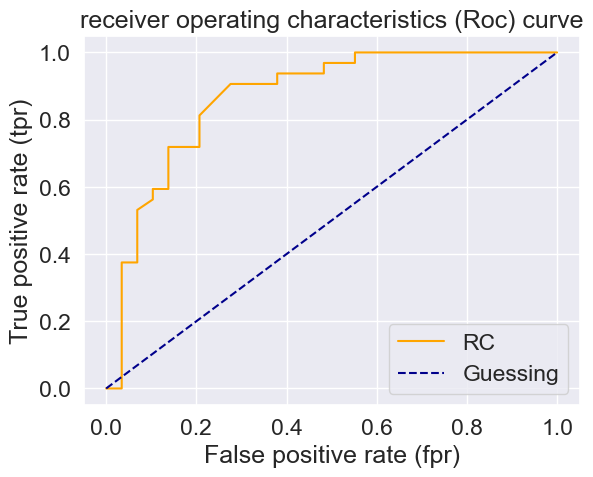

In [217]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plot a roc curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model.
    """
    
    plt.plot(fpr, tpr, color="orange", label="RC")
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("receiver operating characteristics (Roc) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [218]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_probs_positive)

0.8669181034482759

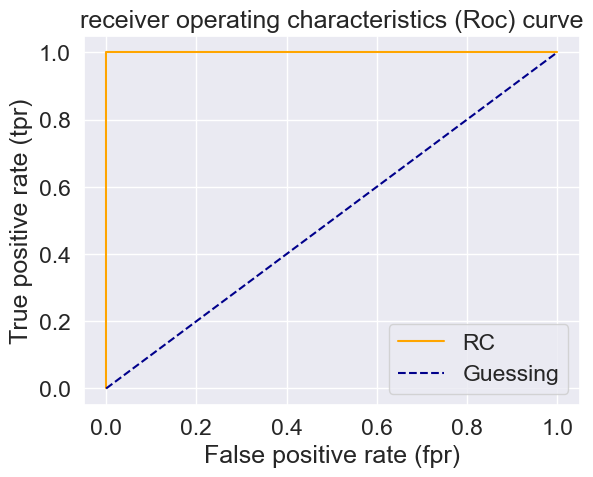

In [219]:
#plot perfect roc curve and auc cureve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

In [220]:
roc_auc_score(Y_test,Y_test)

1.0

### confusion Matrix

A confusion matrix is a quik way to compare the labels a model predicts and the actual labels it was supposed to predict.
In the essence, giving you an idea of where the model is getting confused

In [221]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

confusion_matrix(Y_test, Y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [222]:
pd.crosstab(Y_test,
           Y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [223]:
# How to install a conda packege if it is not downloaded
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3




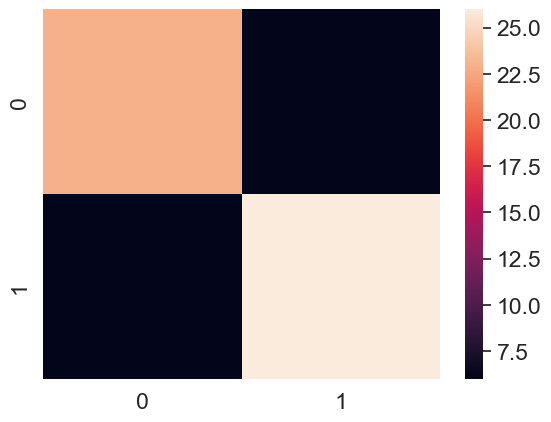

In [224]:
# make our confusion matrix more visual seaborn heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(Y_test,Y_preds)

#plot it is using seaborn
sns.heatmap(conf_mat);

##Confusion matrix

the next way to evaluate a classification model is by using a confusion matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict
In essence, this gives you an idea of where the model of where the model is getting confused

In [226]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

confusion_matrix(Y_test,Y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [227]:
pd.crosstab(Y_test, Y_preds,
           rownames=["Actual"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Actual,,
0,23,6
1,6,26


###Creating a confusion matrix using Scikit-Learn 

To use the new method of creating a confusion matrix with Scikit-learn version 1.0+

In [228]:
import sklearn
sklearn.__version__

'1.2.2'

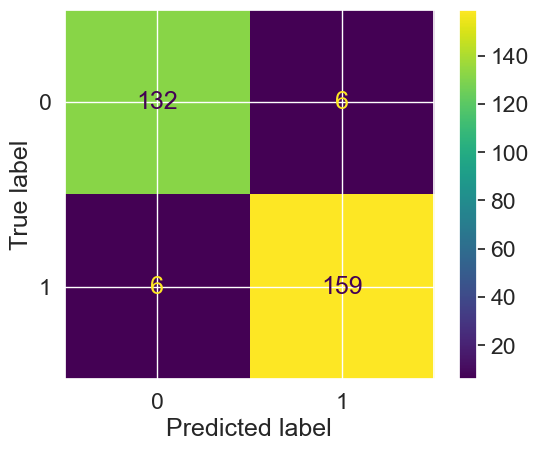

In [229]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y)

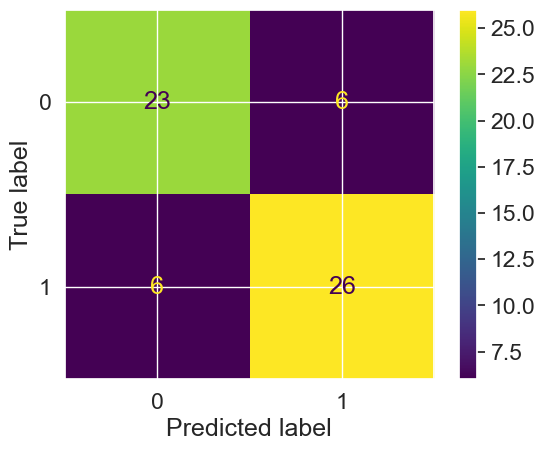

In [230]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test,
                                       y_pred=Y_preds);

### Classification Report

In [231]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [232]:
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

In [233]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model= RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [234]:
model.score(X_test, Y_test)

0.8065734772187598

In [235]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [236]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [237]:
Y_test.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64>

In [238]:
from sklearn.metrics import r2_score

Y_test_mean = np.full(len(Y_test), Y_test.mean())

In [239]:
Y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [240]:
r2_score(y_true = Y_test,
        y_pred = Y_test_mean)

0.0

In [241]:
r2_score(y_true=Y_test,
        y_pred=Y_test)

1.0

In [242]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test,y_preds)
mae

0.32659871732073664

In [243]:
df = pd.DataFrame(data={"actual values": Y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [244]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [245]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [246]:
np.abs(df["differences"]).mean()

0.32659871732073664

In [247]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test, y_preds)
mse

0.2534678520824551

In [248]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [249]:
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [250]:

df_large_error = df.copy()
df_large_error.iloc[0]["squared_diffrences"] = 16


In [251]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [252]:
df_large_error["squared_differences"].mean()

0.2534678520824551

In [253]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [254]:
df_large_error["squared_differences"].mean()

0.7295421709146245

### finally using the scoring parameter

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [256]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, Y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [257]:
#cross validated accuracy
print(f"The cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%")


The cross validated accuracy is:82.48%


In [258]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, Y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [259]:
#cross validated accuracy
print(f"The cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%")


The cross validated accuracy is:82.48%


In [260]:
np.random.seed(42)
cv_precision =cross_val_score(clf, X, Y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [261]:
#cross validated accuracy
print(f"The cross validated precision is:{np.mean(cv_precision)}")


The cross validated precision is:0.8329547346025924


In [262]:
#recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, Y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [263]:
#cross validated accuracy
print(f"The cross validated recall is:{np.mean(cv_recall)}")


The cross validated recall is:0.8545454545454545


Let's see the scoring parametebeing using for regression model

In [264]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [265]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, Y, cv=3, scoring =None)
np.mean(cv_r2)

0.6545458023124507

In [266]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [267]:
#mean absolute error
cv_mse = cross_val_score(model, X, Y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [268]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [269]:
cv_mae = cross_val_score(model, X, Y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [270]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

### 4.3 using different evaluation metrics as scikit-learn function

In [271]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
#create X& Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#create model
clf = RandomForestClassifier()

#fit model
clf.fit(X_train, Y_train)


# make predictions
Y_preds = clf.predict(X_test)

#Evaluation model using evaluation function
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(Y_test, Y_preds)*100:.2f}%")
print(f"Precision:{precision_score(Y_test, Y_preds)*100:.2f}%")
print(f"Recall:{recall_score(Y_test, Y_preds)*100:.2f}%")
print(f"F1:{f1_score(Y_test, Y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy:85.25%
Precision:84.85%
Recall:87.50%
F1:86.15%


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, Y_train)

y_preds = model.predict(X_test)

print("Regression metrics on the test set")
print(f"R^2 score:{r2_score(Y_test, Y_preds)}")
print(f"MAE: {mean_absolute_error(Y_test, Y_preds)}")
print(f"MSE: {mean_squared_error(Y_test, Y_preds)}")

### 5. Improving the model

In [274]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [275]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [293]:
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [294]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X= heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [295]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [297]:
np.random.seed(42)

clf_2 = RandomForestClassifier()
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [299]:
clf_3 = RandomForestClassifier(
                              max_depth=10)

### 5.2 hyperpameter tuning with RandomizedSearchCV

In [301]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}  # Corrected parameter names

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   5.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   5.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   8.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   5.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, mi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [302]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [304]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [305]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [310]:
grid_2 = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto','sqrt'],        
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [312]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.3s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.7s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.5s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.1s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.2s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.1s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.7s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.7s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.7s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.0s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.4s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.0s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.0s


C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None,

In [313]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [314]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


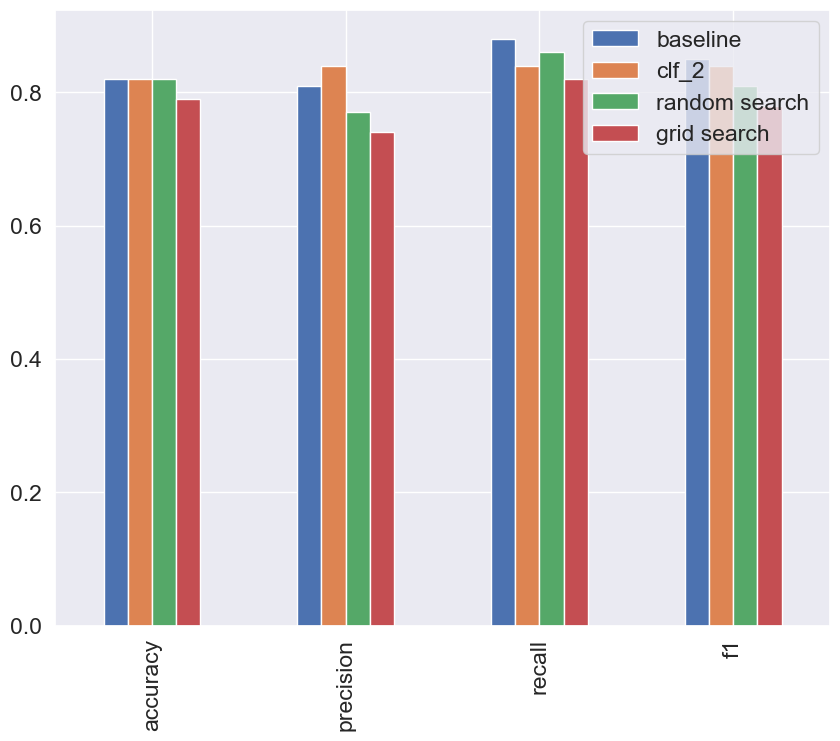

In [317]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search":rs_metrics,
                              "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained model machine learning model


In [318]:
import pickle

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [319]:
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))


In [320]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [321]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [324]:
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [326]:
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together

In [329]:
data = pd.read_csv("car-sales-missing-data.csv")
data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [330]:
data.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

In [331]:
data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [336]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

data = pd.read_csv("car-sales-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)
    ])

model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: A given column is not a column of the dataframe

In [337]:
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=m

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Odometer (KM)'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\utils\__init__.py", line 448, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\pandas\core\indexes\base.py", line 3804, in get_loc
    raise KeyError(key) from err
KeyError: 'Odometer (KM)'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 724, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 426, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\new\Desktop\Sample_project1\env\Lib\site-packages\sklearn\utils\__init__.py", line 456, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [339]:
gs_model.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.